In [106]:
#IMPORTS
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pyAgrum
import pyAgrum.skbn as skbn
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.image as gimg
import pyAgrum.lib.dynamicBN as gdyn
import pyAgrum.causal as pyc
from cairosvg import svg2png
import pyAgrum.causal.notebook as cslnb
from IPython.display import Image, Math

In [107]:
def find_bin(value, edges):
    """
    Given a continuous value and an array of bin edges,
    return the index of the bin that contains the value.
    """
    idx = np.digitize(value, edges, right=False) - 1
    return int(max(0, min(idx, len(edges) - 2)))

/tmp/ipykernel_155414/3225292245.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023-01-01', periods=12, freq='M')


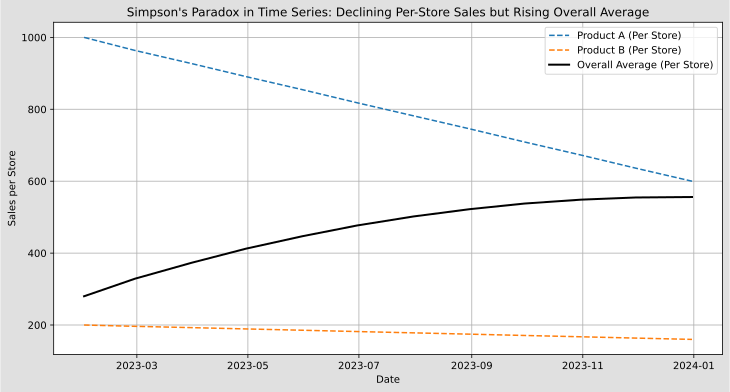

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate monthly dates for a year
dates = pd.date_range(start='2023-01-01', periods=12, freq='M')

# Product A: Decreasing per-store sales, but number of stores increases
per_store_a = np.linspace(1000, 600, 12)  # $1000 to $600 (linear decrease)
num_stores_a = np.linspace(10, 90, 12)    # 10 to 90 stores (linear increase)
sales_a = per_store_a * num_stores_a      # Total sales for Product A

# Product B: Decreasing per-store sales and number of stores
per_store_b = np.linspace(200, 160, 12)   # $200 to $160 (linear decrease)
num_stores_b = np.linspace(90, 10, 12)    # 90 to 10 stores (linear decrease)
sales_b = per_store_b * num_stores_b      # Total sales for Product B

# Calculate aggregate metrics
total_sales = sales_a + sales_b
total_stores = num_stores_a + num_stores_b
avg_per_store = total_sales / total_stores  # Average sales per store

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Product A Sales': sales_a,
    'Product B Sales': sales_b,
    'Total Sales': total_sales,
    'Avg Per Store': avg_per_store
}).set_index('Date')

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Product A Sales'] / num_stores_a, label='Product A (Per Store)', linestyle='--')
plt.plot(df.index, df['Product B Sales'] / num_stores_b, label='Product B (Per Store)', linestyle='--')
plt.plot(df.index, df['Avg Per Store'], label='Overall Average (Per Store)', color='black', linewidth=2)
plt.title("Simpson's Paradox in Time Series: Declining Per-Store Sales but Rising Overall Average")
plt.xlabel('Date')
plt.ylabel('Sales per Store')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
# DATA
# Set random seed for reproducibility
np.random.seed(42)

# Number of time steps
T = 1000

# Initialize arrays for each variable
A = np.random.normal(0, 1, T)  # Exogenous noise
E = np.random.normal(0, 1, T)  # Exogenous noise
B = np.zeros(T)
C = np.zeros(T)
D = np.zeros(T)

latent_var = np.random.normal(0, 1, T)
for t in range(1, T):
    B[t] = 0.3 * A[t] + 3.5 * latent_var[t] + np.random.normal(0, 0.1)
    # B[t] = 0.1 * A[t] + 0.9 * E[t-1] + np.random.normal(0, 0.1)
    # B[t] = 0.5 * A[t] + 1.5 * E[t-1] + np.random.normal(0, 0.1)  # Increased influence of E0 on Bt
    # B[t] = 0.3 * A[t] + 0.8 * E[t-1] + 0.5 * B[t-1] + np.random.normal(0, 0.01) # Introducing higher-order temporal dependencies
    C[t] = 1.7 * B[t] + np.random.normal(0, 0.1)
    D[t] = 0.7 * C[t] + 2.6 * latent_var[t] + np.random.normal(0, 0.1)
    # D[t] = 0.1 * C[t] + 3.5 * E[t-1] + np.random.normal(0, 0.1)
    # D[t] = 1.1 * C[t] + 5.0 * E[t-1] + np.random.normal(0, 0.1)  # Stronger effect of E0 on Dt
    # D[t] = 0.4 * C[t] + 5.0 * E[t-1] + 0.3 * D[t-1] + np.random.normal(0, 0.01) # Introducing higher-order temporal dependencies

# Store in a DataFrame
df = pd.DataFrame({'At': A, 'Bt': B, 'Ct': C, 'Dt': D, 'Et': E})

# Add lagged variable
df['A0'] = np.concatenate([df['At'].values[1:], [0]])
df['B0'] = np.concatenate([df['Bt'].values[1:], [0]])
df['C0'] = np.concatenate([df['Ct'].values[1:], [0]])
df['D0'] = np.concatenate([df['Dt'].values[1:], [0]])
df['E0'] = np.concatenate([df['Et'].values[1:], [0]])
df = df.iloc[1:].reset_index(drop=True)  # Remove first row
df = df.iloc[:-1].reset_index(drop=True)  # Remove last row


** audit **
- At : 
    + method : quantile
    + nbBins : 10
    + type : Continuous
    + minInData : -3.2412673400690726
    + maxInData : 3.852731490654721
- Bt : 
    + method : quantile
    + nbBins : 10
    + type : Continuous
    + minInData : -1.8259084028603405
    + maxInData : 2.057039083400542
- Ct : 
    + method : quantile
    + nbBins : 10
    + type : Continuous
    + minInData : -3.1631720857995496
    + maxInData : 3.50174897375939
- Dt : 
    + method : quantile
    + nbBins : 10
    + type : Continuous
    + minInData : -8.160657950753532
    + maxInData : 10.247280076518178
- Et : 
    + method : quantile
    + nbBins : 10
    + type : Continuous
    + minInData : -2.9403886346642802
    + maxInData : 3.193107567844861
- A0 : 
    + method : quantile
    + nbBins : 10
    + type : Continuous
    + minInData : -3.2412673400690726
    + maxInData : 3.852731490654721
- B0 : 
    + method : quantile
    + nbBins : 10
    + type : Continuous
    + minInData : -1.82590

/tmp/ipykernel_155414/757007545.py:3: DeprecationWarning: 
** pyAgrum.skbn.BNDiscretizer is deprecated since pyAgrum>1.15.0. A pyAgrum.lib.Discretizer has been created.

  discretizer=skbn.BNDiscretizer(defaultDiscretizationMethod='quantile', discretizationThreshold=5, defaultNumberOfBins=n_bins)
/tmp/ipykernel_155414/757007545.py:13: DeprecationWarning: 
  ** Discretizer.discretizedBN is deprecated since pyAgrum>1.15.0. Please use Discretizer.discretizeTemplate instead.
  
  template = discretizer.discretizedBN(df)
/tmp/ipykernel_155414/757007545.py:24: DeprecationWarning: 
  ** Discretizer.discretizedBN is deprecated since pyAgrum>1.15.0. Please use Discretizer.discretizeTemplate instead.
  
  learner = pyAgrum.BNLearner(df, discretizer.discretizedBN(df))


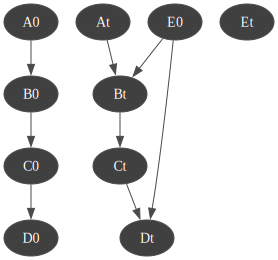

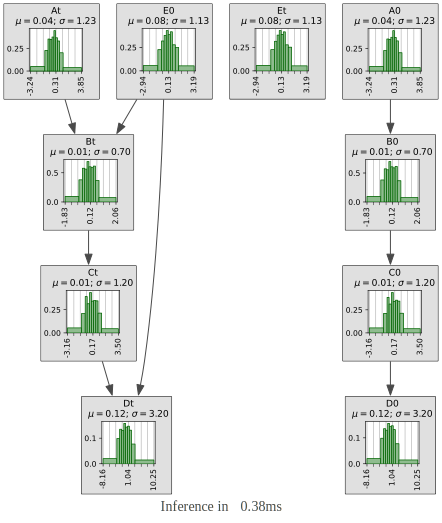

In [109]:
# DISCRETIZER
n_bins = 10
discretizer=skbn.BNDiscretizer(defaultDiscretizationMethod='quantile', discretizationThreshold=5, defaultNumberOfBins=n_bins)
auditDict=discretizer.audit(df)

print()
print("** audit **")
for var in auditDict:
    print(f"- {var} : ")
    for k,v in auditDict[var].items():
        print(f"    + {k} : {v}")

template = discretizer.discretizedBN(df)
template.addArc("A0", "B0")
template.addArc("B0", "C0")
template.addArc("C0", "D0")
template.addArc("At", "Bt")
template.addArc("Bt", "Ct")
template.addArc("Ct", "Dt")
template.addArc("E0", "Bt")
template.addArc("E0", "Dt")
# template.addArc("B0", "Bt")
# template.addArc("D0", "Dt")
learner = pyAgrum.BNLearner(df, discretizer.discretizedBN(df))
learner.useEM(1e-6)
learner.useSmoothingPrior()

bn = learner.learnParameters(template)

time_slices_bn = gdyn.getTimeSlices(bn)
svg2png(bytestring=time_slices_bn,write_to='results/pyAgrum/dbn.png')

gnb.showBN(bn)
gnb.showInference(bn)

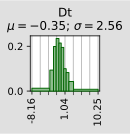


  Dt                                                                                               |
(-8.16066|[-3.17524|[-2.15794|[-1.41718|[-0.64934|[-0.01370|[0.687792|[1.36529;|[2.12575;|[3.42279;|
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.0635  | 0.0951  | 0.1474  | 0.1801  | 0.1362  | 0.1367  | 0.0676  | 0.0629  | 0.0554  | 0.0553  |



<IPython.core.display.Math object>

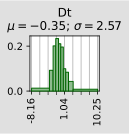


  Dt                                                                                               |
(-8.16066|[-3.17524|[-2.15794|[-1.41718|[-0.64934|[-0.01370|[0.687792|[1.36529;|[2.12575;|[3.42279;|
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.0642  | 0.0939  | 0.1490  | 0.1795  | 0.1338  | 0.1375  | 0.0672  | 0.0638  | 0.0557  | 0.0556  |



In [110]:
cm = pyc.CausalModel(bn)

# ------------------------------
# Precompute Bin Edges and Midpoints for Bt and Dt
# ------------------------------

# For Bt (used as evidence)
quantiles = np.linspace(0, 100, n_bins + 1)
edges_Bt = np.percentile(df['Bt'].values, quantiles)

# For Dt (used for expected value computation)
edges_Dt = np.percentile(df['Dt'].values, quantiles)
midpoints_Dt = [(edges_Dt[i] + edges_Dt[i+1]) / 2.0 for i in range(n_bins)]

b_val = df.iloc[0]['Bt']
bin_idx = find_bin(b_val, edges_Bt)

ie = pyAgrum.LazyPropagation(bn)
ie.setEvidence({"Bt": bin_idx})
ie.addTarget('Dt')
ie.makeInference()
bn_posterior = ie.posterior("Dt")
bn_posterior_values = bn_posterior.toarray()
gnb.showProba(bn_posterior)
a = pyAgrum.getPosterior(bn, target="Dt", evs={"Bt": bin_idx})
print(a)

formula, adj, exp = pyc.causalImpact(cm, "Dt", "Bt", values={"Bt":bin_idx})
display(Math(formula.toLatex()))
gnb.showProba(adj)
print(adj)


In [111]:
pred_bn = sum(bn_posterior_values[j] * midpoints_Dt[j] for j in range(n_bins))
pred_causal = sum(adj.toarray()[j] * midpoints_Dt[j] for j in range(n_bins))

print(f"Bayesian prediction: {pred_bn}")
print(f"Causal prediction: {pred_causal}")

Bayesian prediction: -0.35191324648409034
Causal prediction: -0.3494674555247701


In [112]:
# INFERENCE
# For Bt (used as evidence)
quantiles = np.linspace(0, 100, n_bins + 1)
edges_Bt = np.percentile(df['Bt'].values, quantiles)

# For Dt (used for expected value computation)
edges_Dt = np.percentile(df['Dt'].values, quantiles)
midpoints_Dt = [(edges_Dt[i] + edges_Dt[i+1]) / 2.0 for i in range(n_bins)]

# Evaluate Predictions on a Test Set using BN inference and CausalModel (do-intervention)
n_test = 10
predicted_Dt_bn = []      # Predictions using BN conditioning (setEvidence)
ground_truth_Dt = []

for i in range(n_test):
    # Use the continuous Bt value from the test instance
    b_val = df.iloc[i]['Bt']
    bin_idx = find_bin(b_val, edges_Bt)
    
    # --- BN prediction: Conditioning on Bt = bin_idx ---
    ie = pyAgrum.LazyPropagation(bn)
    bn_prior = ie.posterior("Dt")
    ie.setEvidence({"Bt": bin_idx})
    ie.makeInference()
    bn_posterior = ie.posterior("Dt")
    bn_posterior_values = bn_posterior.toarray()
    pred_bn = sum(bn_posterior_values[j] * midpoints_Dt[j] for j in range(n_bins))
    predicted_Dt_bn.append(pred_bn)
    ground_truth_Dt.append(df.iloc[i]['Dt'])

predicted_Dt_bn = np.array(predicted_Dt_bn)
ground_truth_Dt = np.array(ground_truth_Dt)

# Compare Predictions to Ground Truth
bn_RMSE = np.sqrt(np.mean((predicted_Dt_bn - ground_truth_Dt) ** 2))
bn_NRMSE = bn_RMSE/np.std(ground_truth_Dt)

In [113]:
cm = pyc.CausalModel(bn)
# ------------------------------
# Precompute Bin Edges and Midpoints for Bt and Dt
# ------------------------------
# For Bt (used as evidence)
quantiles = np.linspace(0, 100, n_bins + 1)
edges_Bt = np.percentile(df['Bt'].values, quantiles)

# For Dt (used for expected value computation)
edges_Dt = np.percentile(df['Dt'].values, quantiles)
midpoints_Dt = [(edges_Dt[i] + edges_Dt[i+1]) / 2.0 for i in range(n_bins)]

n_test = 10
predicted_Dt_causal = []  # Predictions using CausalModel (do-intervention)
ground_truth_Dt = []

for i in range(n_test):
    # Use the continuous Bt value from the test instance
    b_val = df.iloc[i]['Bt']
    bin_idx = find_bin(b_val, edges_Bt)
    
    # --- BN prediction: Conditioning on Bt = bin_idx ---
    ie = pyAgrum.LazyPropagation(bn)
    
    # Convert the BN to a CausalModel.
    # Note: In pyAgrum, the CausalModel is built directly from the BN.
    formula, adj, exp = pyc.causalImpact(cm, "Dt", "Bt", values={"Bt":bin_idx})
    posterior_causal = adj.toarray()
    pred_causal = sum(posterior_causal[j] * midpoints_Dt[j] for j in range(n_bins))
    predicted_Dt_causal.append(pred_causal)
    
    # Ground-truth Dt value
    ground_truth_Dt.append(df.iloc[i]['Dt'])

predicted_Dt_causal = np.array(predicted_Dt_causal)
ground_truth_Dt = np.array(ground_truth_Dt)


cm_RMSE = np.sqrt(np.mean((predicted_Dt_causal - ground_truth_Dt) ** 2))
cm_NRMSE = cm_RMSE/np.std(ground_truth_Dt)

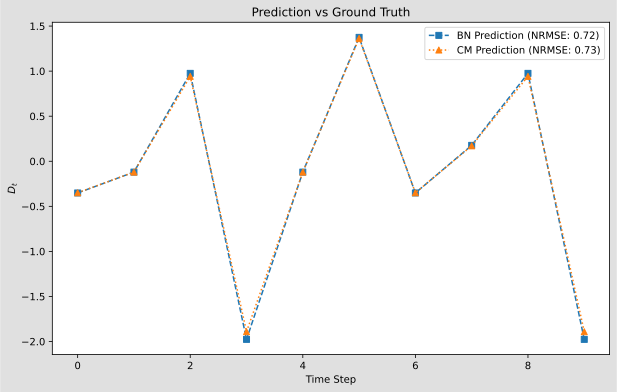

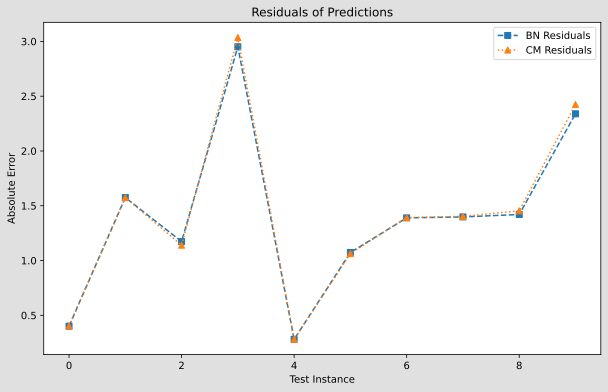

In [114]:
# Plot residuals
fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(ground_truth_Dt, label='Ground Truth', linestyle='-', marker='o')
ax.plot(predicted_Dt_bn, label=f'BN Prediction (NRMSE: {bn_NRMSE:.2f})', linestyle='--', marker='s')
ax.plot(predicted_Dt_causal, label=f'CM Prediction (NRMSE: {cm_NRMSE:.2f})', linestyle=':', marker='^')
ax.set_xlabel('Time Step')
ax.set_ylabel('$D_t$')
ax.set_title('Prediction vs Ground Truth')
ax.legend()
plt.show()

# Plot residuals
residuals_bn = np.abs(predicted_Dt_bn - ground_truth_Dt)
residuals_cm = np.abs(predicted_Dt_causal - ground_truth_Dt)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(residuals_bn, label='BN Residuals', linestyle='--', marker='s')
ax.plot(residuals_cm, label='CM Residuals', linestyle=':', marker='^')
ax.set_xlabel('Test Instance')
ax.set_ylabel('Absolute Error')
ax.set_title('Residuals of Predictions')
ax.legend()
plt.show()
